RangeIndex(start=0, stop=705, step=1)


"filenames = os.listdir(filepath)         # 读取全部文件名\n\n#plt.figure()\nfor filename in filenames:\n    domain = os.path.abspath(filepath)   # 返回一个绝对路径名\n    info = os.path.join(domain,filename) # 将路径名和文件名组合成完整的文件路径\n    drt = pd.read_csv(info, header=2)\n    drt.columns = ['Gamma','tau']\n    drt = drt.loc[(drt.tau>=taul)&(drt.tau<=tauh)]\n    \n    drt.plot(x='tau',y='Gamma',logx=True,  fontsize=18,ylim=[0,310],yticks=[0,50,100,150,200,250,300]) \n    plt.ylabel('G(t)',fontsize=18)\n    plt.xlabel('t (s)',fontsize=18)\n    plt.title(filename)\n\n\n#plt.xlabel('tau')\nplt.show() "

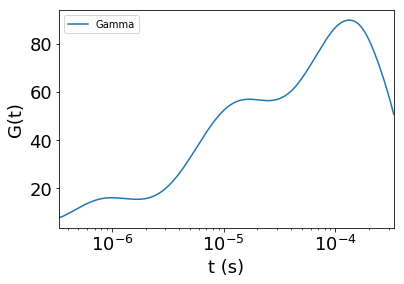

In [24]:
# !/usr/bin python3
# Fukun Shi, 2019.04.22
# https://chrisostrouchov.com/post/peak_fit_xrd_python/
'''
基于最小二乘lmfit做multi-peaks分析
'''
import os
import math
import random

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import optimize, signal

from lmfit import models

%matplotlib inline

#######################
# 1 输入需要拟合的曲线#

fl = 3e3
fh = 3e6
taul = 1/fh
tauh = 1/fl

filepath='D:\\Nutstore\\PhD\\Experiment\\EIS_data_transform\\P1_data\\P1DRT\\26-04-2017\\26 60ns\\2650.csv'

drt = pd.read_csv(filepath,header=2)
drt.columns = ['Gamma','tau']
drt = drt.loc[(drt.tau>=taul)&(drt.tau<=tauh)]
drt.reset_index(inplace=True)

drt.plot(x='tau',y='Gamma',logx=True,  fontsize=18) 
plt.ylabel('G(t)',fontsize=18)
plt.xlabel('t (s)',fontsize=18)

'''filenames = os.listdir(filepath)         # 读取全部文件名

#plt.figure()
for filename in filenames:
    domain = os.path.abspath(filepath)   # 返回一个绝对路径名
    info = os.path.join(domain,filename) # 将路径名和文件名组合成完整的文件路径
    drt = pd.read_csv(info, header=2)
    drt.columns = ['Gamma','tau']
    drt = drt.loc[(drt.tau>=taul)&(drt.tau<=tauh)]
    
    drt.plot(x='tau',y='Gamma',logx=True,  fontsize=18,ylim=[0,310],yticks=[0,50,100,150,200,250,300]) 
    plt.ylabel('G(t)',fontsize=18)
    plt.xlabel('t (s)',fontsize=18)
    plt.title(filename)


#plt.xlabel('tau')
plt.show() '''


steps 1 nan


C:\Users\fukun\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in log
C:\Users\fukun\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in log
C:\Users\fukun\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in log
C:\Users\fukun\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


IndexError: index 2 is out of bounds for axis 0 with size 2

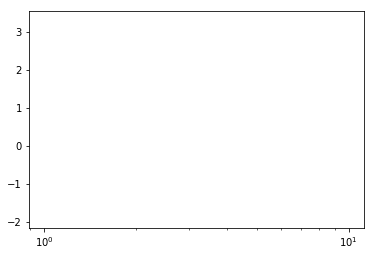

In [25]:
# !/usr/bin python3
# Fukun Shi, 2019.04.22
# https://chrisostrouchov.com/post/peak_fit_xrd_python/
'''
基于最小二乘用自定义函数做multi-peaks分析
'''
import os
import math
import random

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import optimize, signal

from lmfit import models

%matplotlib inline

'''
定义函数用于peak-analysis。需要认为判断peaks数目，及需要拟合的函数类型
'''
#################
# 自定义高斯函数#
def Cole(x, tau, alpha):
    '''Cole Function'''
    return 1/2*np.pi*(np.sin(np.pi*alpha)/(np.cosh(alpha*np.log(x/tau))+np.cos(np.pi*alpha)))

tau = 1e-2 # intensity
alpha = 0.5  # mean
n = 201
x = np.logspace(-10, 0, n)            #自变量
y = Cole(x,tau,alpha) + np.random.randn(n) # 因变量，用于fit的值
plt.semilogx(np.log10(x),y)

def cost(parameters):
    '''cost function for single Gaussian '''
    a, b = parameters
    # y has been calculated in previous snippet
    return np.sum(np.power(Cole(x, a, b) - y, 2)) / len(x)

result = optimize.minimize(cost, [1e-2, 0.5])
print('steps', result.nit, result.fun)
print(f'amplitude: {result.x[0]:3.3f} mean: {result.x[1]:3.3f} sigma: {result.x[2]:3.3f}')

g_0 = [250.0, 4.0, 5.0]
g_1 = [20.0, -5.0, 1.0]
n = 150
x = np.linspace(-10, 10, n)
y = g(x, *g_0) + g(x, *g_1) + np.random.randn(n)

fig, ax = plt.subplots()
ax.scatter(x, y, s=1)
ax.plot(x, g(x, *g_0))
ax.plot(x, g(x, *g_1))

def cost(parameters):
    '''Cost function for two Gaussian'''
    g_0 = parameters[:2]
    g_1 = parameters[3:6]
    return np.sum(np.power(g(x, *g_0) + g(x, *g_1) - y, 2)) / len(x)

initial_guess = [1, 0, 1, -1, 0, 1] #np.random.randn(6)
result = optimize.minimize(cost, initial_guess)  # 使用scipy的minimize计算损失函数最小值
print('steps', result.nit, result.fun)
print(f'g_0: amplitude: {result.x[0]:3.3f} mean: {result.x[1]:3.3f} sigma: {result.x[2]:3.3f}')
print(f'g_1: amplitude: {result.x[3]:3.3f} mean: {result.x[4]:3.3f} sigma: {result.x[5]:3.3f}')

fig, ax = plt.subplots()
ax.scatter(x, y, s=1)
ax.plot(x, g(x, *result.x[:3]))
ax.plot(x, g(x, *result.x[3:6]))
ax.plot(x, g(x, *result.x[:3]) + g(x, *result.x[3:6]))
#########################################
# 定义两个Gaussian函数，进行复合函数拟合#
model_1 = models.GaussianModel(prefix='m1_')
model_2 = models.GaussianModel(prefix='m2_')
model = model_1 + model_2

params_1 = model_1.make_params(center=1, sigma=1)
params_2 = model_2.make_params(center=-1, sigma=1)
params = params_1.update(params_2)

output = model.fit(y, params, x=x)
fig, gridspec = output.plot(data_kws={'markersize': 1})


steps 5 0.9807727568348077
amplitude: 0.011 mean: 0.491


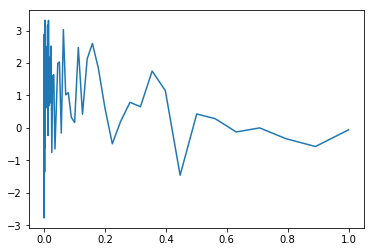

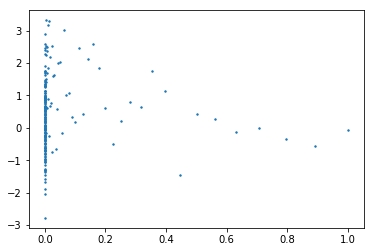

In [36]:
import os
import math
import random

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import optimize, signal

from lmfit import models

%matplotlib inline

'''
定义函数用于peak-analysis。需要认为判断peaks数目，及需要拟合的函数类型.
参考‘1999-非对称DRT-Distribution of relaxation times from dielectric 
spectroscopy using Monte Carlo simulated annealing_Application to a-PVDF’Table 1
'''
#################
# 自定义高斯函数#
def Cole(x, tau, alpha):
    '''Cole Function'''
    return 1/2*np.pi*(np.sin(np.pi*alpha)/(np.cosh(alpha*np.log(x/tau))+np.cos(np.pi*alpha)))

def Gaussian(x, A, u, d):
    '''Gaussian Function'''
    return A / (d * math.sqrt(2 * math.pi)) * np.exp(-(x-u)**2 / (2*d**2))


tau = 1e-2 # intensity
alpha = 0.5  # mean
n = 201
x = np.logspace(-10, 0, n)          #自变量
y = Cole(x,tau,alpha) + np.random.randn(n) # 因变量，用于fit的值

plt.plot(x,y)

fig, ax = plt.subplots()
ax.scatter(x, y, s=2)

def cost(parameters):
    '''cost function for single Gaussian '''
    a, b = parameters
    # y has been calculated in previous snippet
    return np.sum(np.power(Cole(x, a, b) - y, 2)) / len(x)

result = optimize.minimize(cost, [1e-2, 0.5])
print('steps', result.nit, result.fun)
print(f'amplitude: {result.x[0]:3.3f} mean: {result.x[1]:3.3f}')

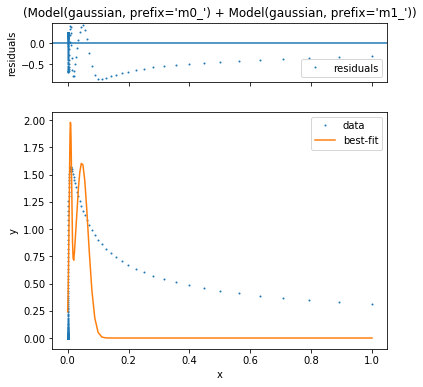

In [29]:
##########################################################################
# 利用lmfit拟合double Gaussian-peaks。先定义parameters，然后用fit函数拟合#
def generate_model(spec):
    '''定义适合使用lmfit拟合的复合函数模型，包括高斯，洛伦茨和福格特函数'''
    composite_model = None
    params = None
    x = spec['x']
    y = spec['y']
    x_min = np.min(x)
    x_max = np.max(x)
    x_range = x_max - x_min
    y_max = np.max(y)
    for i, basis_func in enumerate(spec['model']):              # enumerate序列化输入的list，用于分离序列号和实例值
        prefix = f'm{i}_'                                       # f字符串格式化语法，类似format和%。prefix适用于区分复合函数内的同名参数
        model = getattr(models, basis_func['type'])(prefix=prefix) 
                                                                # models包含了lmfit内建的函数库。getattr用于提取type对应的函数。选定函数
        if basis_func['type'] in ['GaussianModel', 'LorentzianModel', 'VoigtModel']: 
                                                                # for now VoigtModel has gamma constrained to sigma
            model.set_param_hint('sigma', min=1e-6, max=x_range)# 用于make_params，指定参数的尺度和范围
            model.set_param_hint('center', min=x_min, max=x_max)
            model.set_param_hint('height', min=1e-6, max=1.1*y_max)
            model.set_param_hint('amplitude', min=1e-6)
                                                                # default guess is horrible!! do not use guess()。定义默认初始值
            default_params = {                                  # 基于XRD的理解而选定的初始值
                prefix+'center': x_min + x_range * random.random(),
                prefix+'height': y_max * random.random(),
                prefix+'sigma': x_range * random.random()
            }
        else:
            raise NotImplemented(f'model {basis_func["type"]} not implemented yet')
        if 'help' in basis_func:                                # allow override of settings in parameter
            for param, options in basis_func['help'].items():
                model.set_param_hint(param, **options)
        model_params = model.make_params(**default_params, **basis_func.get('params', {})) # 确定参数
        if params is None:
            params = model_params
        else:
            params.update(model_params)
        if composite_model is None:
            composite_model = model
        else:
            composite_model = composite_model + model
    return composite_model, params

spec = {
    'x': x,
    'y': y,
    'model': [
        {'type': 'GaussianModel'},
        {'type': 'GaussianModel'}
    ]
}

model, params = generate_model(spec)  # 重复上面自定义的两个Gaussian复合函数的拟合。这里采用lmfit内建Gaussian函数。
output = model.fit(spec['y'], params, x=spec['x'])# lmfit的fit函数，将（objective function，parameters，variables）拟合进model定义的函数
fig, gridspec = output.plot(data_kws={'markersize': 1})